In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
from app_store_scraper import AppStore
import json

In [4]:
def ios_reviews(app_name):
    app = AppStore(country='us', app_name=app_name)
    app.review()
    return app

In [5]:
df_aedit = pd.DataFrame(np.array(ios_reviews('Aedit').reviews),columns=['review'])
df_aedit = df_aedit.join(pd.DataFrame(df_aedit.pop('review').tolist()))
df_aedit.head()

2021-12-10 11:11:07,909 [INFO] Base - Searching for app id
2021-12-10 11:11:16,600 [INFO] Base - Initialised: AppStore('us', 'aedit', 1322246202)
2021-12-10 11:11:16,601 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/aedit/id1322246202
2021-12-10 11:11:20,144 [INFO] Base - [id:1322246202] Fetched 142 reviews (142 fetched in total)


,review,isEdited,title,developerResponse,rating,date,userName
0,I was surprised by this app. I downloaded it f...,False,This is actually an amazing app—please fix it.,"{'id': 22950142, 'body': 'Thank you for your f...",5,2021-05-20 08:41:19,Zoie Knoch
1,Seeing is believing. Having a visual of potent...,False,Super Fun!,"{'id': 26369580, 'body': 'We couldn't agree mo...",5,2021-11-12 05:29:04,TJ$tein
2,AEDIT really helps walk you through the proces...,False,impressive,"{'id': 26369550, 'body': 'Thank you Lonny for ...",5,2021-11-09 14:46:19,Lonny Barton
3,Wasn’t expecting much when I downloaded this a...,False,it’s like seeing yourself how everyone else se...,NaN,5,2020-07-09 00:02:22,07/07/2020
4,You have to pay to use most of the of the feat...,False,Must pay to use and choppy,"{'id': 26021251, 'body': 'Hi Hellahollywood. W...",1,2021-10-26 11:13:08,hellahollywood


In [6]:
df_aedit.shape

(142, 7)

In [8]:
df = df_aedit[df_aedit['rating']<3]

2021-12-10 11:12:03,111 [INFO] numexpr.utils - NumExpr defaulting to 4 threads.


In [9]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [10]:
import nltk
stemmer = nltk.PorterStemmer()

In [11]:
from nltk.corpus import stopwords
from collections import Counter
import re

stop_words = set(stopwords.words('English'))

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower_case=True, remove_punctuation=True, remove_numbers=True, lemmatizing=True, remove_stopwords=True, stemming=True):
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.lemmatizing = lemmatizing
        self.remove_stopwords = remove_stopwords
        self.stemming = stemming
        
    def fit(self,X ,y=None):
        return self
    
    def transform(self, X, y=None):
        X_processed = []
        for text in X:
            if self.lower_case:
                text = text.lower()
            if self.remove_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' ', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            if self.remove_stopwords:
                text = [word for word in text.split() if not word in stop_words]
            """if self.lemmatizing:
                lem_words = []
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem_words.append(word_lemma)
                text = lem_words
                """
            if self.stemming:
                stemmed_words=[]
                for word in text:
                    word_stem = stemmer.stem(word)
                    stemmed_words.append(word_stem)
                text = stemmed_words
            bigram_words = []
            for i in range(len(text)-1):
                bigram_words.append(text[i]+" "+text[i+1])
            word_counts = Counter(bigram_words)
            #word_counts = Counter(text)
            """if self.lemmatizing:
                #lem_counter = Counter()
                lem=[]
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem.append(word_lemma)"""
            
            X_processed.append(word_counts)
        return np.array(X_processed)

In [13]:
text_processor = TextProcessor()
data = text_processor.fit_transform(df['review'])
data

array([Counter({'pay use': 1, 'use featur': 1, 'featur model': 1, 'model wrap': 1, 'wrap face': 1, 'face around': 1, 'around form': 1, 'form chang': 1, 'chang topographi': 1, 'topographi featur': 1, 'featur similar': 1, 'similar built': 1, 'built charact': 1, 'charact video': 1, 'video game': 1, 'game scan': 1, 'scan face': 1, 'face time': 1, 'time get': 1, 'get someth': 1, 'someth even': 1, 'even remot': 1, 'remot close': 1, 'close accur': 1, 'accur depict': 1, 'depict would': 1, 'would sound': 1, 'sound like': 1, 'like great': 1, 'great idea': 1, 'idea practic': 1, 'practic turn': 1, 'turn promis': 1, 'promis mayb': 1, 'mayb develop': 1, 'develop could': 1, 'could great': 1, 'great tool': 1, 'tool futur': 1}),
       Counter({'iphon scan': 1, 'scan qualiti': 1, 'qualiti ok': 1, 'ok tri': 1, 'tri multipl': 1, 'multipl time': 1, 'time good': 1, 'good qualiti': 1, 'qualiti enough': 1, 'enough featur': 1, 'featur even': 1, 'even paid': 1, 'paid version': 1, 'version worth': 1, 'worth pri

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [62]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['title'])

In [63]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [64]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [65]:
for i in range(true_k):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :20]:
         print(' %s' % terms[ind])

Cluster 0:
 work
 free
 awful
 great
 won
 face
 scan
 doesn
 app
 worst
 clickbait
 download
 hacked
 needs
 quality
 lip
 lift
 time
 waste
 right
Cluster 1:
 crashes
 constant
 work
 download
 idea
 hacked
 great
 freezing
 free
 facial
 face
 earn
 worst
 dont
 kept
 doesn
 does
 cost
 clickbait
 choppy
Cluster 2:
 terrible
 actually
 money
 cost
 dont
 great
 freezing
 free
 facial
 face
 earn
 download
 doesn
 doesnt
 idea
 does
 crashes
 constant
 clickbait
 choppy


In [66]:
issues = [ 'App scanner issues',
          'App freezing and crashing',
          'Paid features'
         ]

In [67]:
df['Issues'] = model.predict(X)

<ipython-input-67-0fae5155c3c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Issues'] = model.predict(X)


In [68]:
df['Issues'].value_counts()

0    22
1     4
2     2
Name: Issues, dtype: int64

In [21]:
vocabulary_size=1000
total_count = Counter()
for word_count in data:
    for word, count in word_count.items():
        total_count[word] += count#min(count, 10)
most_common = total_count.most_common()[:vocabulary_size]
vocabulary = {word: count for index, (word, count) in enumerate(most_common)}

In [22]:
vocabulary

{'scan face': 7,
 'download app': 4,
 'wast time': 4,
 'tri scan': 3,
 'pay use': 2,
 'use featur': 2,
 'even use': 2,
 'use app': 2,
 'error messag': 2,
 'everi time': 2,
 'tri anyth': 2,
 'face wast': 2,
 'app crash': 2,
 'featur model': 1,
 'model wrap': 1,
 'wrap face': 1,
 'face around': 1,
 'around form': 1,
 'form chang': 1,
 'chang topographi': 1,
 'topographi featur': 1,
 'featur similar': 1,
 'similar built': 1,
 'built charact': 1,
 'charact video': 1,
 'video game': 1,
 'game scan': 1,
 'face time': 1,
 'time get': 1,
 'get someth': 1,
 'someth even': 1,
 'even remot': 1,
 'remot close': 1,
 'close accur': 1,
 'accur depict': 1,
 'depict would': 1,
 'would sound': 1,
 'sound like': 1,
 'like great': 1,
 'great idea': 1,
 'idea practic': 1,
 'practic turn': 1,
 'turn promis': 1,
 'promis mayb': 1,
 'mayb develop': 1,
 'develop could': 1,
 'could great': 1,
 'great tool': 1,
 'tool futur': 1,
 'iphon scan': 1,
 'scan qualiti': 1,
 'qualiti ok': 1,
 'ok tri': 1,
 'tri multipl'

Most common mentioned phrases and terms 

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor2(BaseEstimator, TransformerMixin):
    def __init__(self, lower_case=True, remove_punctuation=True, remove_numbers=True, lemmatizing=True, remove_stopwords=True, stemming=True):
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.lemmatizing = lemmatizing
        self.remove_stopwords = remove_stopwords
        self.stemming = stemming
        
    def fit(self,X ,y=None):
        return self
    
    def transform(self, X, y=None):
        X_processed = []
        for text in X:
            if self.lower_case:
                text = text.lower()
            if self.remove_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' ', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            if self.remove_stopwords:
                text = [word for word in text.split() if not word in stop_words]
            word_counts = Counter(text)
            if self.lemmatizing:
                lem_words = Counter()
                for word,count in word_counts.items():
                    word_lemma = lemmatizer.lemmatize(word)
                    lem_words[word_lemma]+=count
                
            """f self.stemming:
                stemmed_words=[]
                for word in text:
                    word_stem = stemmer.stem(word)
                    stemmed_words.append(word_stem)
                text = stemmed_words
            bigram_words = []
            for i in range(len(text)-1):
                bigram_words.append(text[i]+" "+text[i+1])
            word_counts = Counter(bigram_words)
            #word_counts = Counter(text)
            """
            """if self.lemmatizing:
                #lem_counter = Counter()
                lem=[]
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem.append(word_lemma)"""
            
            X_processed.append(word_counts)
        return np.array(X_processed)

In [24]:
text_processor2 = TextProcessor2()
word_counts = text_processor2.fit_transform(df['review'])

In [25]:
vocabulary2 = Counter()
for item in word_counts:
    for word,count in item.items():
        vocabulary2[word]+=count

In [26]:
vocabulary2.most_common()

[('app', 18),
 ('face', 9),
 ('scan', 9),
 ('use', 7),
 ('try', 7),
 ('pay', 6),
 ('even', 6),
 ('anything', 6),
 ('time', 6),
 ('features', 5),
 ('times', 4),
 ('get', 4),
 ('like', 4),
 ('error', 4),
 ('waste', 4),
 ('crashes', 4),
 ('would', 3),
 ('tried', 3),
 ('money', 3),
 ('nothing', 3),
 ('scanning', 3),
 ('keeps', 3),
 ('free', 3),
 ('really', 3),
 ('download', 3),
 ('something', 2),
 ('accurate', 2),
 ('great', 2),
 ('idea', 2),
 ('could', 2),
 ('quality', 2),
 ('good', 2),
 ('enough', 2),
 ('paid', 2),
 ('version', 2),
 ('worth', 2),
 ('month', 2),
 ('subscription', 2),
 ('back', 2),
 ('unless', 2),
 ('monetize', 2),
 ('cosmetic', 2),
 ('cool', 2),
 ('different', 2),
 ('literally', 2),
 ('things', 2),
 ('without', 2),
 ('take', 2),
 ('facial', 2),
 ('shows', 2),
 ('message', 2),
 ('every', 2),
 ('several', 2),
 ('excited', 2),
 ('totally', 2),
 ('nose', 2),
 ('lift', 2),
 ('worst', 2),
 ('modeling', 1),
 ('wraps', 1),
 ('around', 1),
 ('form', 1),
 ('changes', 1),
 ('topogra

In [74]:
X = df.copy()
X['keyword'] = word_counts

In [75]:
X['keyword']

4      {'pay': 1, 'use': 1, 'features': 2, 'modeling'...
13     {'iphone': 1, 'scan': 1, 'quality': 2, 'ok': 1...
23     {'nothing': 1, 'like': 1, 'downloading': 1, 'a...
72     {'cool': 1, 'idea': 1, 'design': 1, 'unfortuna...
75     {'literally': 1, 'try': 1, 'things': 1, 'free'...
83     {'really': 1, 'cool': 1, 'concept': 1, 'withou...
90     {'able': 1, 'scan': 1, 'face': 1, 'take': 1, '...
99     {'use': 1, 'try': 1, 'feature': 1, 'app': 1, '...
102    {'downloaded': 1, 'app': 1, 'twice': 1, 'think...
105    {'really': 1, 'excited': 1, 'totry': 1, 'app':...
108    {'pointless': 1, 'keeps': 1, 'saying': 1, 'mov...
111    {'constantly': 1, 'crashes': 1, 'try': 1, 'sca...
113    {'excited': 1, 'try': 1, 'really': 1, 'disappo...
114    {'bought': 1, 'month': 1, 'morph': 1, 'nose': ...
115    {'tried': 1, 'scanning': 1, 'several': 1, 'dif...
116    {'pay': 1, 'membership': 1, 'use': 1, 'feature...
119    {'anything': 2, 'try': 1, 'besides': 1, 'like'...
121    {'app': 1, 'crashes': 1,

In [76]:
issue_areas = ['scan', 'crashes',  'pay', 'features', 'subscription']

In [77]:
issue_counts={}

for issue in issue_areas:
    count = 0
    for x in X['keyword']:
        if issue in x.keys():
            count+=1
    issue_counts[issue]=count

## 
## A deeper analysis into reviews
## 

In [36]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import sent_tokenize, word_tokenize
import docx2txt

def get_phrases_containing_word(target_word, passage, left_margin = 10, right_margin = 10):
    tokens = nltk.word_tokenize(passage)
    text = nltk.Text(tokens) 
    ## Collect all the index or offset position of the target word
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
 
    ## Collect the range of the words that is within the target word by using text.tokens[start;end].
    ## The map function is use so that when the offset position - the target range < 0, it will be default to zero
    concordance_txt = ([text.tokens[list(map(lambda x: x-5 if (x-left_margin)>0 else 0,[offset]))[0]:offset+right_margin]
                        for offset in c.offsets(target_word)])
                         
    ## join the sentences for each of the target phrase and return it
    return [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

In [37]:
def get_phrases(word):
    doc = ' '.join(df['review'])
    results = get_phrases_containing_word(word, doc)
    for result in results:
        print(result)

In [39]:
get_phrases('app')

. Nothing like downloading an app fully realizing it has in-app purchases but then being 
d think the vendors this app virtualizes would be smart enough to monetize from the 
take a picture using this app . Thus the facial restructure portion of the app 
facial restructure portion of the app that shows cosmetic procedure results has never worked . 
try on feature . The app kept freezing . I had to keep opening it 
I ’ ve downloaded this app twice thinking it was my error . There isn 
was really excited toTry this app and see the facial scanning features , but it 
’ t even use the app because of this Was excited to try this but 
several different settings and the app refused to scan my face . You have to 
unless you pay for the app This app crashes as soon as you scan your 
pay for the app This app crashes as soon as you scan your face . 
3scan is pretty bad This app is the worst gets all your info then totally 
a lip lift in the App Store yet I ’ m unable once I download 
unable once I

In [41]:
get_phrases('pay')

You have to pay to use most of the of the features . 
everything else you have to pay a ridiculous amount of money . Don ’ t 
. I won ’ t pay for something I can ’ t tell is any 
face . You have to pay for a membership to use any of the features 
a brow lift unless you pay for the app This app crashes as soon as 
Keeps crashing You have to pay to use it Won ’ t even scan my 


In [43]:
get_phrases('money')

wish I could get my money back . Nothing like downloading an app fully realizing 
pay a ridiculous amount of money . Don ’ t bother . Really cool concept 
it . Not worth the money and is not accurate nor does anything differently then 


In [44]:
get_phrases('scan')

game . I had to scan my face 4 times to get something even remotely 
an iPhone 12 . The scan quality was just ok . I tried multiple times 
because it won ’ t scan my face . Tried scanning like 5 different times 
ve not been able to scan my face in nor take a picture using this 
crashes when I try to scan my face . Can ’ t even use the 
and the app refused to scan my face . You have to pay for a 
crashes as soon as you scan your face . Don ’ t waste your time 
it Won ’ t even scan my face properly You fill out this entire sheet 


In [47]:
get_phrases('face')

. The modeling wraps your face around a form , which changes the topography of 
I had to scan my face 4 times to get something even remotely close . 
won ’ t scan my face . Tried scanning like 5 different times but keeps 
been able to scan my face in nor take a picture using this app . 
take a pic of my face . Waste of time . Delete . Constantly crashes 
I try to scan my face . Can ’ t even use the app because 
app refused to scan my face . You have to pay for a membership to 
soon as you scan your face . Don ’ t waste your time . The 
’ t even scan my face properly You fill out this entire sheet of things 


In [48]:
get_phrases('features')

most of the of the features . The modeling wraps your face around a form 
changes the topography of your features . It ’ s similar to a built your 
there weren ’ t enough features even with the paid version to be worth the 
and see the facial scanning features , but it doesn ’ t seem to be 
to use any of the features or book an appointment with a surgeon . You 


In [49]:
get_phrases('time')

throws an error message EVERY time ! ! ! Couldn ’ t use the try 
Don ’ t waste your time . I was really excited toTry this app and 
to be working , every time I try I get an error message This is 
my face . Waste of time . Delete . Constantly crashes when I try to 
Don ’ t waste your time . The free version literally does nothing and the 
use it . Waste of time don ’ t download this is THE WORST editing 


In [50]:
get_phrases('crashes')

time . Delete . Constantly crashes when I try to scan my face . Can 
for the app This app crashes as soon as you scan your face . Don 
do anything bc it just crashes The app just crashes when I use it . 
just crashes The app just crashes when I use it . Waste of time don 


In [54]:
get_phrases('subscription')

I paid for a 1-month subscription and wish I could get my money back . 
ANY edits without a PRO subscription . Bummer I would have totally used it too 


In [55]:
get_phrases('error')

keeps coming up with an error You can literally only try on 2 things for 
worked . It throws an error message EVERY time ! ! ! Couldn ’ t 
twice thinking it was my error . There isn ’ t an option to try 
I try I get an error message This is pointless . It keeps saying to 


In [56]:
get_phrases('download')

’ m unable once I download the app Can ’ t do anything bc it 
of time don ’ t download this is THE WORST editing app ever garbage Don 
ever garbage Don ’ t download this app 


In [57]:
get_phrases('quality')

iPhone 12 . The scan quality was just ok . I tried multiple times but 
wasn ’ t very good quality and there weren ’ t enough features even with 


### The following were identified as problems in 3 and lower star ratings

- facial restructure portion of the app that shows cosmetic procedure results doesnt work
- The app keeps freezing
- several different settings that dont work
- most of the features are paid
- payment for a membership to use any of the features 


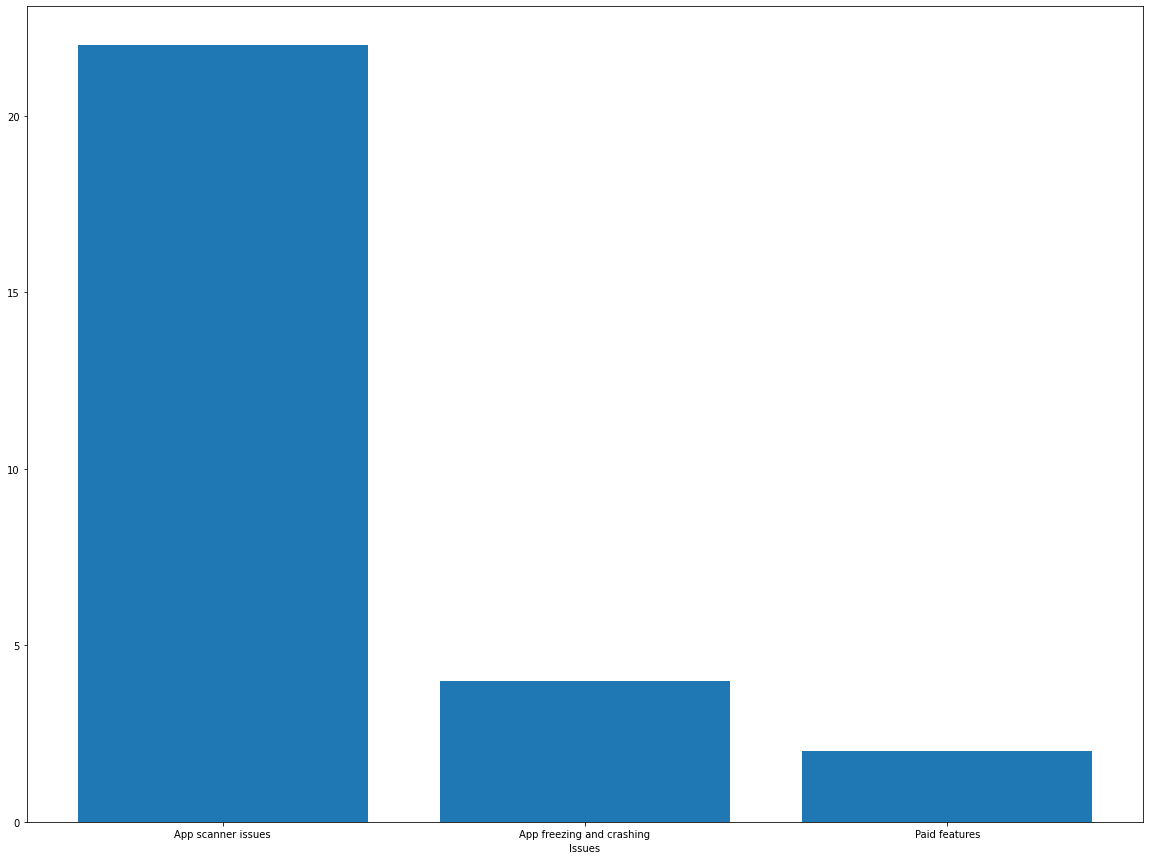

In [70]:
plt.figure(figsize=(20,15))
plt.bar([0,1,2], height=df['Issues'].value_counts())
plt.xlabel('Issues')
plt.xticks(ticks=[0,1,2], labels=issues)
plt.show()

##### Highest no of issues were observed in terms of app scanner issues(approx 22), app freezing and crashing and lastly features that need to be paid for
##### 

C:\Users\kulsum kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


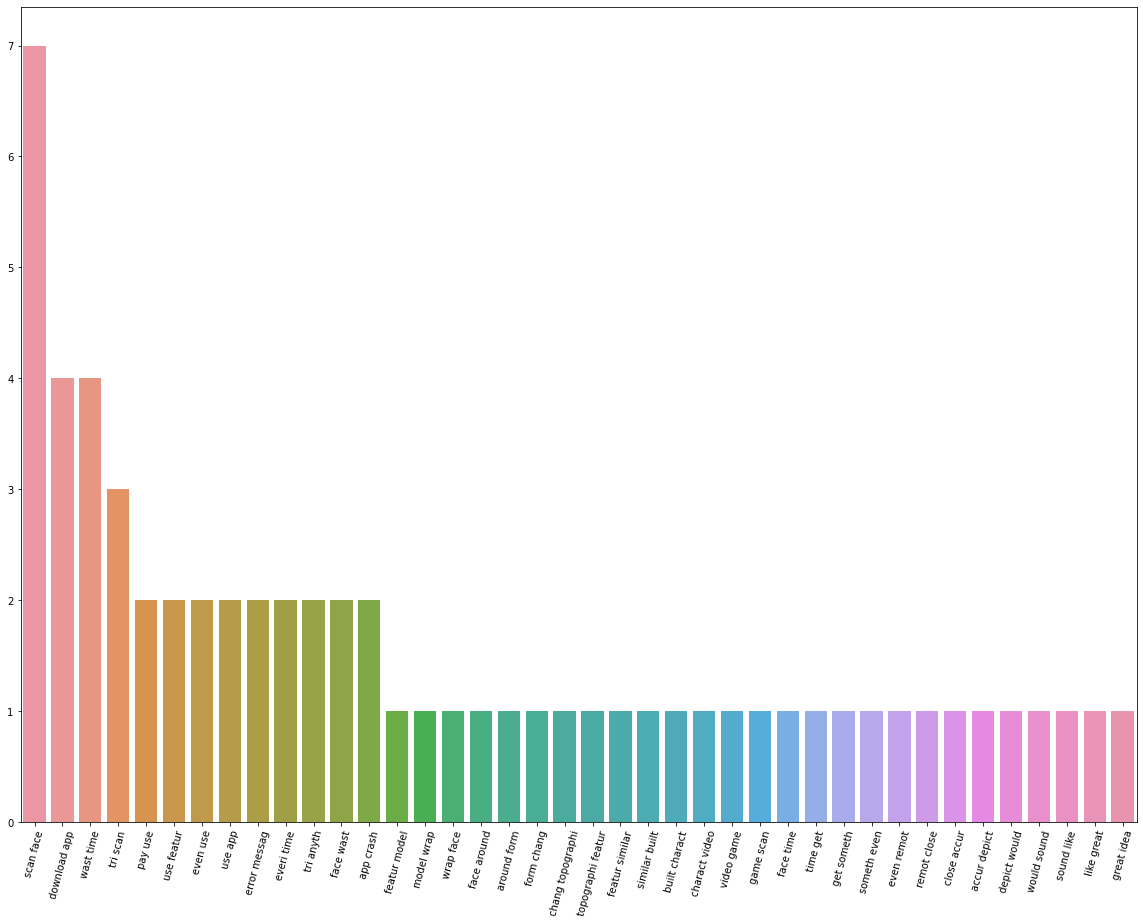

In [71]:
plt.figure(figsize=(20,15))
sns.barplot(list(vocabulary.keys())[:40],list(vocabulary.values())[:40])
plt.xticks(rotation=75)
plt.show()

C:\Users\kulsum kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


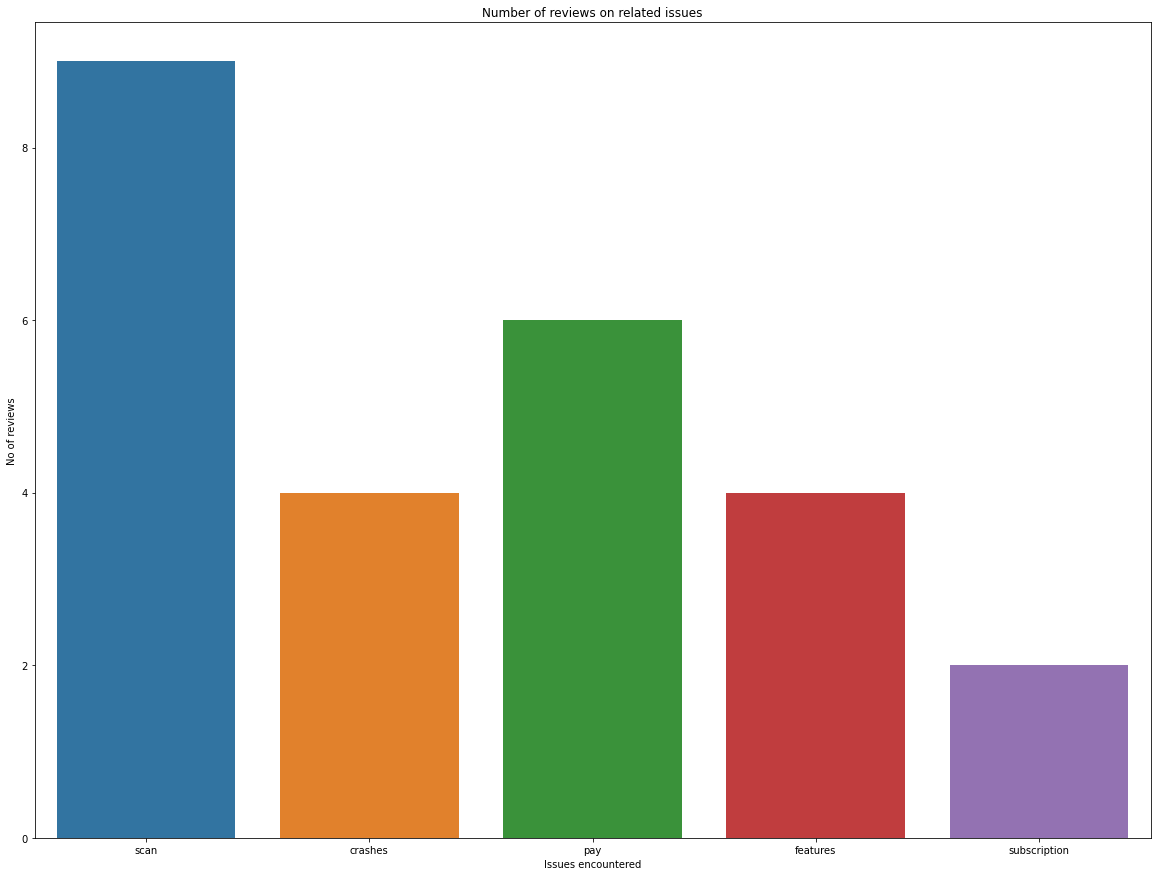

In [78]:
plt.figure(figsize=(20,15))
sns.barplot(list(issue_counts.keys()), list(issue_counts.values()))
plt.title("Number of reviews on related issues")
plt.xlabel("Issues encountered")
plt.ylabel("No of reviews")
plt.show()